<a href="https://colab.research.google.com/github/Vixuz144/Simulacion-1/blob/main/Extra_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import random
from numba import jit
import matplotlib.pyplot as plt

In [2]:
# @jit(nopython = True)
def f1(nr = 10**3):
  l1, l2 = [], []
  for i in range(nr):
    r =  random()
    r_anti = 1-r
    if 0 <= r < 1/3:
      x = 3/2 * r
    else:
      x = 1/4 + np.sqrt(3/4*r  - 3/16)

    if 0 <= r_anti < 1/3:
      y = 3/2 * r_anti
    else:
      y = 1/4 + np.sqrt(3/4*r_anti  - 3/16)

    f = np.sqrt(1 + np.sin(x))
    g = np.sqrt(1 + np.sin(y))
    l1.append(f)
    l2.append((f+g)/2)
  return np.array(l1), np.array(l2)

1.241263107359941 Con reducciòn de varianza: 1.2413520479751272
Reducciòn de varianza orcentual: 91.07876%


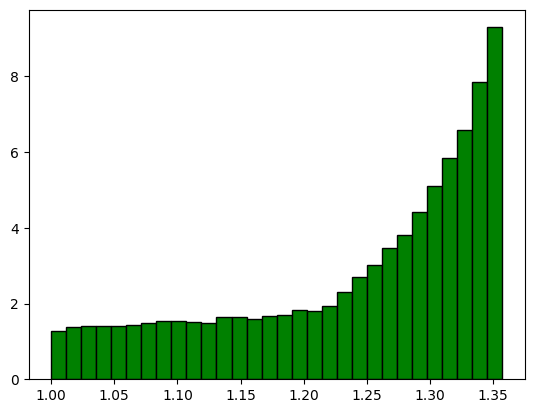

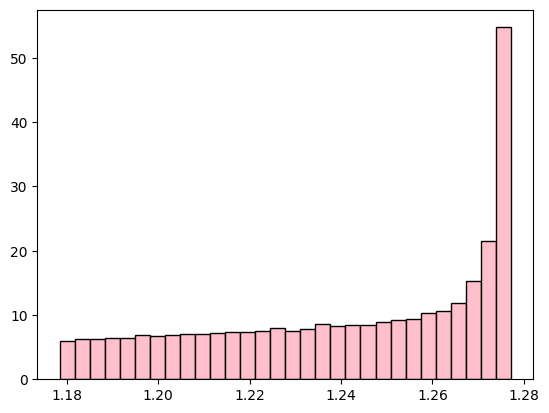

In [3]:
l1, l2 = f1(10**5)
print(np.mean(l1), 'Con reducciòn de varianza:', np.mean(l2))
v1, v2 = np.var(l1,ddof=1), np.var(l2,ddof=1)
print(f'Reducciòn de varianza orcentual: {round(100*(v1-v2)/v1, 5)}%')
plt.hist(l1, bins = 30, density = True, color = 'g', edgecolor = 'k')
plt.show()
plt.hist(l2, bins = 30, density = True, color = 'pink', edgecolor = 'k')
plt.show()

In [4]:
@jit(nopython = True)
def f2(T, ll, ls, rep):
  lip = []
  lm = []
  for k in range(rep):
    t, i = 0, 0

    tl = t - np.log(random())/ll
    ts = np.inf
    t = min(tl,ts)
    mx = 0
    suma = 0

    while t < T:
      mx = max(mx, i)
      if t == tl: #Llegada
        i += 1
        tl = t - np.log(random())/ll
        if i == 1: #si es el primer cliente
          ts = t - np.log(random())/ls
      else: #Salida
        i -= 1
        if i == 0: #Se vacia
          ts = np.inf
        else:
          ts = t - np.log(random())/ls

      ta = t
      t = min(tl,ts)
      suma += i * (t - ta)
      # lista_tiempos.append(t)
      # lista_individuos.append(i)
    if T > t:
      suma += i * (T - t)

    lip.append(suma/T)
    lm.append(mx)
  return lip, lm

In [5]:
a, b = f2(60, 2, 2.2, 10**4)
print(f'El valor esperado del valor medio del nùmero de usuarios en el intervalo [0, 60] es: {np.mean(a)}')
print(f'El valor esperado del màximo de personas en el sistema en el mismo intervalo es: {np.mean(b)}')

El valor esperado del valor medio del nùmero de usuarios en el intervalo [0, 60] es: 5.4175404326495835
El valor esperado del màximo de personas en el sistema en el mismo intervalo es: 14.6736


In [6]:
@jit(nopython = True)
def f3(nr = 10**6):
  l, lx, lc = [], [], []
  for i in range(nr):
    r = random()
    x = -np.log(r)/1
    l.append(np.sqrt(x))
    lx.append(x)
  m = np.array(lx).mean()
  c = -np.cov(l,lx)[0,1]/np.cov(l,lx)[1,1]
  for i in range(nr):
    lc.append(l[i] + c*(lx[i]-m))
  return l, lc

In [7]:
l, lc = f3()
m, mc, v, vc = np.mean(l), np.mean(lc), np.var(l, ddof = 1), np.var(lc, ddof = 1)
print(m, 'Con reducciòn de varianza:', mc)
print('Reduccin de varianza aproximada (simulaciòn):',100 * (v-vc)/v)
print('Reduccin de varianza exacta (talacha):',100*(np.pi/16)/(1 - np.pi / 4))

0.8868516422115319 Con reducciòn de varianza: 0.88685164221152
Reduccin de varianza aproximada (simulaciòn): 91.50947792774889
Reduccin de varianza exacta (talacha): 91.49480915813719


In [8]:
print('Reduccin de varianza exacta (talacha):',100*np.pi/(16 - 4*np.pi))

Reduccin de varianza exacta (talacha): 91.49480915813719
